In [1]:
import pandas as pd
import numpy as np
patents = pd.read_excel('datasets/patents_AGRI.xlsx')
patents['Count'] = 1

patents['agricultur_patent'] = np.where( (patents['count_matches']==0), 0,1)
patents['agricultur_patent_yes'] = np.where( (patents['count_matches']==0), "no", "yes")
patents.Count.sum()

15954

In [2]:
pd.set_option('display.max_columns', None)
patents.head(10)

,Unnamed: 0,Unnamed: 0.1,id,type,number,country,date,abstract,title,kind,num_claims,filename,withdrawn,matches,count_matches,count_unique_matches,date_str,link,First_year,After_2004,Count,agricultur_patent,agricultur_patent_yes
0,2765,4356203,8033047,utility,8033047,US,2011-10-11,An algae cultivation system and method. In an ...,Algae cultivation systems and methods,B2,14,ipg111011.xml,0.0,'cultivation',9,1,20111011,https://worldwide.espacenet.com/publicationDet...,2011,1,1,1,yes
1,15183,2392876,6105309,utility,6105309,US,2000-08-22,The plant cultivation apparatus and plant cul...,Plant cultivation method and apparatus,A,11,pftaps20000822_wk34.zip,0.0,'cultivation',9,1,20000822,https://worldwide.espacenet.com/publicationDet...,2000,0,1,1,yes
2,1583,2269111,5981271,utility,5981271,US,1999-11-09,Process of outdoor thin-layer cultivation of ...,Process of outdoor thin-layer cultivation of m...,A,9,pftaps19991109_wk45.zip,0.0,'cultivation',9,1,19991109,https://worldwide.espacenet.com/publicationDet...,1999,0,1,1,yes
3,11685,86484,10087113,utility,10087113,US,2018-10-02,The present invention relates to a composition...,"Composition for fertilizing agricultural land,...",B2,20,ipg181002.xml,NaN,"'agriculture', 'agricultural'",6,1,20181002,https://worldwide.espacenet.com/publicationDet...,2018,1,1,1,yes
4,4318,2627510,6340654,utility,6340654,US,2002-01-22,A freshness-retaining agent for an agricultura...,Freshness-retaining agent and method for agric...,B1,12,pg020122.zip,0.0,'agricultural',5,1,20020122,https://worldwide.espacenet.com/publicationDet...,2002,0,1,1,yes
5,669,743659,4444882,utility,4444882,US,1984-04-24,Cultivation of microorganisms is controlled b...,Process and apparatus for controlling cultivat...,A,8,pftaps19840424_wk17.zip,0.0,'cultivation',4,1,19840424,https://worldwide.espacenet.com/publicationDet...,1984,0,1,1,yes
6,2998,5004972,8685707,utility,8685707,US,2014-04-01,The present disclosure describes use of filame...,"Construction material made of algae, method fo...",B2,21,ipg140401.xml,0.0,"'harvesting', 'cultivation'",4,1,20140401,https://worldwide.espacenet.com/publicationDet...,2014,1,1,1,yes
7,3313,5140762,8822200,utility,8822200,US,2014-09-02,Provided is an open diatom cultivation method ...,Method for open diatom cultivation,B2,6,ipg140902.xml,0.0,'cultivation',4,2,20140902,https://worldwide.espacenet.com/publicationDet...,2014,1,1,1,yes
8,9839,1103939,4805642,utility,4805642,US,1989-02-21,A process is provided for the dry treatment o...,Process for removing inorganic nitrate from ag...,A,13,pftaps19890221_wk08.zip,0.0,'agricultural',4,1,19890221,https://worldwide.espacenet.com/publicationDet...,1989,0,1,1,yes
9,13022,2983753,6698134,utility,6698134,US,2004-03-02,The present invention discloses a method and a...,Method of cultivating fresh spirulina at home ...,B1,10,pg040302.zip,0.0,'cultivation',3,1,20040302,https://worldwide.espacenet.com/publicationDet...,2004,1,1,1,yes


In [3]:
patents.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'type', 'number', 'country', 'date',
       'abstract', 'title', 'kind', 'num_claims', 'filename', 'withdrawn',
       'matches', 'count_matches', 'count_unique_matches', 'date_str', 'link',
       'First_year', 'After_2004', 'Count', 'agricultur_patent',
       'agricultur_patent_yes'],
      dtype='object')

# Adjusting the dataset

#### Dates and status of the policy

In [4]:
patents.date = pd.to_datetime(patents.date)

In [5]:
type(patents.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
patents['First_year'] = pd.DatetimeIndex(patents['date']).year

In [7]:
# agriculture patents (before subset)

print(len(patents[patents["agricultur_patent_yes"]=="yes"]))

127


# Subset the data to only include EU countries with patents as from 2004

In [8]:
patents=patents[patents["After_2004"]>0]
patents.Count.sum()

8377

In [9]:
# agriculture patents

print(len(patents[patents["agricultur_patent_yes"]=="yes"]))

83


# Plots
## patents per country

In [10]:
# pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams

In [11]:
patents.country.unique()

array(['US'], dtype=object)

#### Dataset "kind"

In [12]:
# dataset aggregated to country level
kind=patents.groupby('kind').sum() # aggregate the data by country
kind['kind'] = kind.index # add rownames as columns
kind['kind_with_agricultur_patent'] = np.where((kind['agricultur_patent']>0), 1, 0)

# subset dataset with only agriculture patents
kind_subset=kind[kind["agricultur_patent"]>0] 
kind_subset=kind_subset.sort_values(by=['agricultur_patent'], ascending=False)

kind.head(10)

,Unnamed: 0,Unnamed: 0.1,num_claims,withdrawn,count_matches,count_unique_matches,date_str,First_year,After_2004,Count,agricultur_patent,kind,kind_with_agricultur_patent
kind,,,,,,,,,,,,,
B1,6079472,3177020158,14108,0.0,17,798,15931916458,1593140,792,792,13,B1,1
B2,49477595,33379041834,129904,12.0,112,7569,151078036996,15107308,7505,7505,69,B2,1
E1,99930,104294684,492,0.0,0,15,301700188,30169,15,15,0,E1,0
H1,9095,13825529,22,0.0,2,2,40241106,4024,2,2,1,H1,1
P2,230247,235379923,34,0.0,0,34,683127536,68310,34,34,0,P2,0
P3,193242,200798999,29,0.0,0,29,583050412,58303,29,29,0,P3,0


Types of patents: https://www.epo.org/searching-for-patents/helpful-resources/first-time-here/definitions.html

#### Dataset "kind"

#### Patents per kind (all patents)

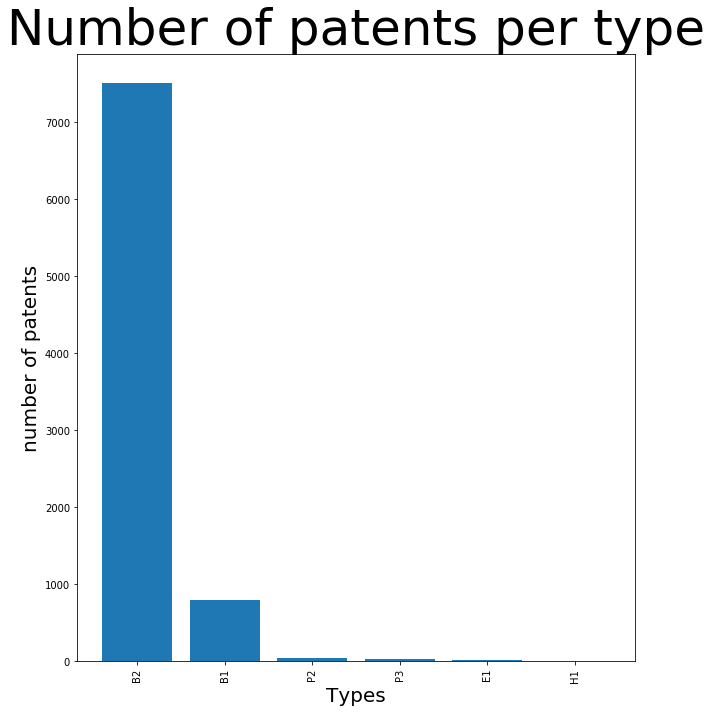

In [13]:
kind=kind.sort_values(by=['Count'], ascending=False)

rcParams['figure.figsize'] = 10,10 # changes the dimensions of the plot (width, height)

# plot 
x_units =(kind['kind'].to_list()) # change column to list to use it for the plot
y_units = (kind['Count'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('Types', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
plt.title('Number of patents per type', fontsize = 50)

plt.tight_layout()
plt.show()

#plt.savefig('Graphics/Patents_per_kind.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot 


In [14]:
patents.groupby('kind').sum()

,Unnamed: 0,Unnamed: 0.1,num_claims,withdrawn,count_matches,count_unique_matches,date_str,First_year,After_2004,Count,agricultur_patent
kind,,,,,,,,,,,
B1,6079472,3177020158,14108,0.0,17,798,15931916458,1593140,792,792,13
B2,49477595,33379041834,129904,12.0,112,7569,151078036996,15107308,7505,7505,69
E1,99930,104294684,492,0.0,0,15,301700188,30169,15,15,0
H1,9095,13825529,22,0.0,2,2,40241106,4024,2,2,1
P2,230247,235379923,34,0.0,0,34,683127536,68310,34,34,0
P3,193242,200798999,29,0.0,0,29,583050412,58303,29,29,0


#### Patents per kind (only agriculture)

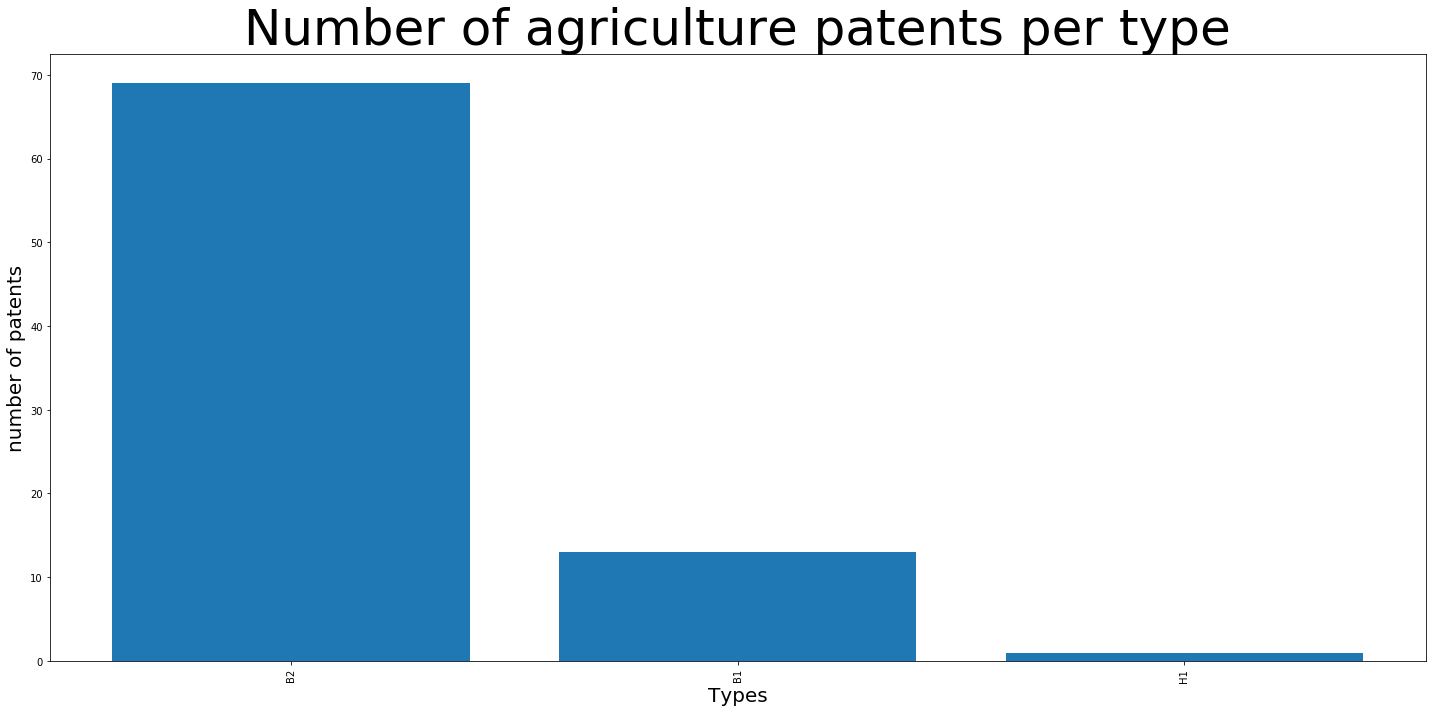

In [15]:
rcParams['figure.figsize'] = 20,10 # changes the dimensions of the plot (width, height)

# plot 
x_units =(kind_subset['kind'].to_list()) # change column to list to use it for the plot
y_units = (kind_subset['agricultur_patent'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('Types', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
plt.title('Number of agriculture patents per type', fontsize = 50)

plt.tight_layout()
plt.show()

#plt.savefig('Graphics/Patents_agriculture_per_kind.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


In [16]:
patents.groupby(['kind','agricultur_patent']).sum()

Unnamed: 0  Unnamed: 0.1  num_claims  withdrawn  \
kind agricultur_patent                                                    
B1   0                     5991460    3123842494       13882        0.0   
     1                       88012      53177664         226        0.0   
B2   0                    49017330   33067101756      128687       12.0   
     1                      460265     311940078        1217        0.0   
E1   0                       99930     104294684         492        0.0   
H1   0                        6858       6912763           3        0.0   
     1                        2237       6912766          19        0.0   
P2   0                      230247     235379923          34        0.0   
P3   0                      193242     200798999          29        0.0   

                        count_matches  count_unique_matches      date_str  \
kind agricultur_patent                                                      
B1   0                              0                   785   15670158099   
     1                             17                    13     261758359   
B2   0                              0                  7496  149688600927   
     1                            112                    73    1389436069   
E1   0                              0                    15     301700188   
H1   0                              0                     1      20120403   
     1                              2                     1      20120703   
P2   0                              0                    34     683127536   
P3   0                              0                    29     583050412   

                        First_year  After_2004  Count  
kind agricultur_patent                                 
B1   0                     1566965         779    779  
     1                       26175          13     13  
B2   0                    14968369        7436   7436  
     1                      138939          69     69  
E1   0                       30169          15     15  
H1   0                        2012           1      1  
     1                        2012           1      1  
P2   0                       68310          34     34  
P3   0                       58303          29     29

#### all patents + agricultural patents per type combined

Text(0.5, 1.0, 'Number of Patents per type')

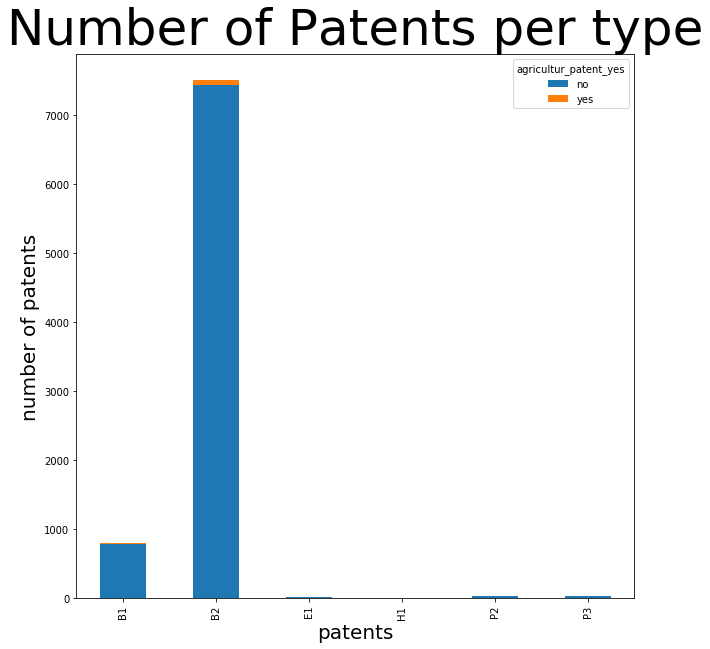

In [17]:
rcParams['figure.figsize'] = 10,10 # changes the dimensions of the plot (width, height)

patents.groupby(['kind','agricultur_patent_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('patents', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
plt.title('Number of Patents per type', fontsize = 50)

#plt.savefig('Graphics/Patents_divided_per_kind.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


In [18]:
patents.groupby('agricultur_patent').sum()

,Unnamed: 0,Unnamed: 0.1,num_claims,withdrawn,count_matches,count_unique_matches,date_str,First_year,After_2004,Count
agricultur_patent,,,,,,,,,,
0,55539067,36738330619,143127,12.0,0,8360,166946757565,16694128,8294,8294
1,550514,372030508,1462,0.0,131,87,1671315131,167126,83,83


In [19]:
# preparation
from flashtext import KeywordProcessor
def extract(vec, dictionary, info=False):
    matrix = []
    for line in vec:
        matrix.append(dictionary.extract_keywords(str(line), span_info=info))
    return matrix


# extracting patent application (A documents)
terms = ['B2','B1']
terms_dict = KeywordProcessor()
terms_dict.add_keywords_from_list(terms)
terms_extracted = extract(patents.kind, terms_dict)
rows = [list(set(i)) if len(i)>0 else '' for i in terms_extracted]
# patents['patent_specification'] = [str(i).replace('[', '').replace(']', '') for i in rows]
patents['patent_specification'] = [len(i) for i in terms_extracted]
# patents['patent_type'] = np.where((patents['count_matches_patent_specification']==0), "other","patent_specification")
# # del laws_and_policies['hard_law']
# # del laws_and_policies['count_matches_hard_law']

patents=patents[patents['patent_specification']>0]

print("all")
print(len(patents))

print("agriculture")
print(len(patents[patents["agricultur_patent_yes"]=="yes"]))

all
8297
agriculture
82


#### agricultural patents out of all patents ( 1 = agriculture patent)

Text(0.5, 1.0, 'Total number of agriculture and other patents')

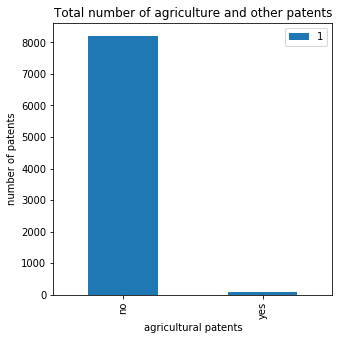

In [20]:
rcParams['figure.figsize'] = 5, 5 # changes the dimensions of the plot (width, height)

patents.groupby(['agricultur_patent','Count']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('agricultural patents')
plt.ylabel('number of patents')
L=plt.legend()
plt.xticks((0,1), ("no","yes"))
plt.title('Total number of agriculture and other patents')


#plt.savefig('Graphics/ratio_agricultural_patents.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


# Patents per year

#### all patents + agricultural patents per year (ABSOLUT VALUES)

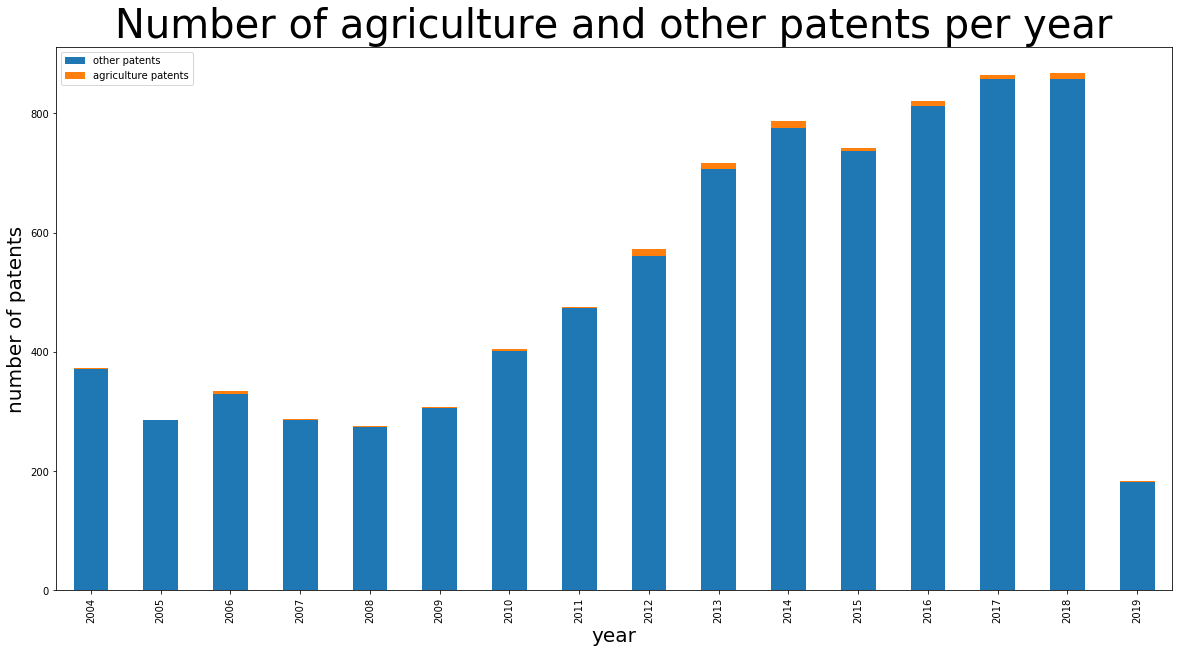

In [21]:
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

patents.groupby(['First_year','agricultur_patent_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other patents')
L.get_texts()[1].set_text('agriculture patents')
plt.title('Number of agriculture and other patents per year', fontsize = 40)

plt.savefig('graphics/Patents_total_divided_per_year_absolut_new_keywords.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### all patents + agricultural patents per year (PERCENTAGES)

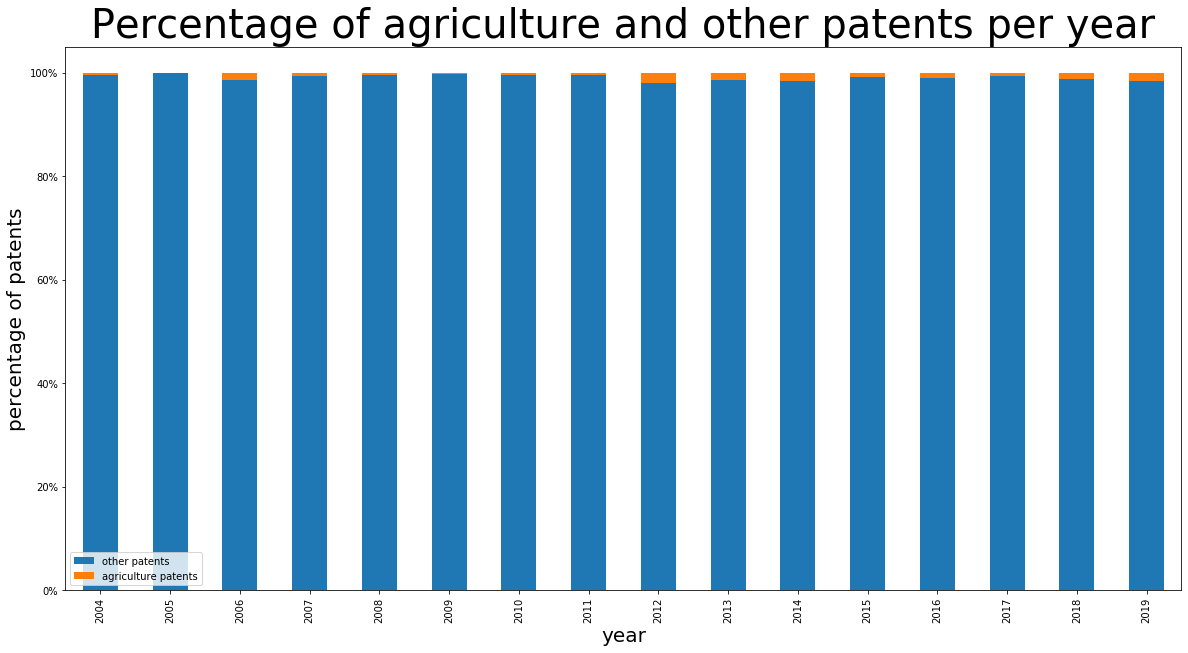

In [22]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

patents.groupby(['First_year','agricultur_patent_yes']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('percentage of patents', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other patents')
L.get_texts()[1].set_text('agriculture patents')
plt.title('Percentage of agriculture and other patents per year', fontsize = 40)


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('Graphics/Patents_total_divided_per_year_percentage_new_keywords.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot

In [23]:
# aggregate
Percentage = patents[['First_year', 'Count', 'agricultur_patent']].copy()
Percentage=Percentage.groupby('First_year').sum() # aggregate the data by country
Percentage['agriculture_patents_percentage'] = (Percentage['agricultur_patent'] / Percentage ['Count']) * 100
Percentage['other_patents_percentage'] = 100 - Percentage['agriculture_patents_percentage']

# add percentage change
AgriPat = Percentage['agricultur_patent'].tolist()
AgriPat
agriculture_patents_percentage_change = []
for x in range(1, len(AgriPat), 1):
    val_1 = AgriPat[x-1]
    if val_1 == 0.0: #Check if val_1 is 0.
        agriculture_patents_percentage_change.append('nan')
    else:
        val_2 = AgriPat[x]
        diff = int(round((float(val_2)/val_1)*100)) # change to float -->round--> int
        agriculture_patents_percentage_change.append(diff)
agriculture_patents_percentage_change.insert(0,'nan')
    
Percentage['agriculture_patents_percentage_change'] = agriculture_patents_percentage_change

Percentage.head(30)

,Count,agricultur_patent,agriculture_patents_percentage,other_patents_percentage,agriculture_patents_percentage_change
First_year,,,,,
2004,373,2,0.536193,99.463807,nan
2005,285,0,0.000000,100.000000,0
2006,335,5,1.492537,98.507463,nan
2007,288,2,0.694444,99.305556,40
2008,275,1,0.363636,99.636364,50
2009,307,1,0.325733,99.674267,100
2010,404,2,0.495050,99.504950,200
2011,475,2,0.421053,99.578947,100
2012,572,11,1.923077,98.076923,550
